# Sentiment Analysis

# Data : 네이버 영화 리뷰

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data= pd.read_table('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
test_data= pd.read_table('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [ ]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
len(train_data), len(test_data)

(150000, 50000)

# Q1. 트레이닝 데이터를 트레이닝 셋과 벨리데이션 셋으로 분할하시오.

**규칙**
1. train : valid = 8 : 2
2. label이 골고루 분할되어 들어가도록 stratify하게 분할한다.
3. random state, seed 등은 2021로 통일
4. 변수명 :
    * x_train, x_valid
    * y_train, y_valid
5. test_data도, x와 y를 분리해둔다.
    * x_test, y_test

In [ ]:
####################
## Your Code here ##
####################
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=2021, stratify=train_data['label'])
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
print(train_data.shape, test_data.shape, val_data.shape)

(120000, 3) (50000, 3) (30000, 3)


In [ ]:
x_train = train_data['document'].astype('str')
x_test = test_data['document'].astype('str')
x_valid = val_data['document'].astype('str')
y_train = train_data['label']
y_test = test_data['label']
y_valid = val_data['label']

# Q2. x를 문장들이 담긴 리스트로 변환하시오.

ex> ['와 이 영화 재밌음', '크아앙 울부짖었다' ,... ]

In [ ]:
####################
## Your Code here ##
####################
x_train = x_train.to_list()
x_test = x_test.to_list()
x_valid = x_valid.to_list()

In [ ]:
y_train = y_train.values
y_test = y_test.values
y_valid = y_valid.values

# Q3. X를 tokenize하고, index의 sequence로 바꾸어 내시오.

**규칙**
1. 상위 40000개 단어만 사용하기로 한다.

In [ ]:
####################
## Your Code here ##
####################
from keras.preprocessing.text import Tokenizer

max_words = 40000
tokenizer = Tokenizer(num_words=max_words, lower=False)

# Text --> Sequence
tokenizer.fit_on_texts(x_train)
# 위에서 설정한 토크나이즈 규칙에 따라, X_train을 토크나이징
# X_train을 토큰화 해두고, 각 token에 index를 붙여둠
x_train = tokenizer.texts_to_sequences(x_train) # 텍스트의 시퀀스를 index의 시퀀스로 바꿔둠
x_test = tokenizer.texts_to_sequences(x_test) # 텍스트의 시퀀스를 index의 시퀀스로 바꿔둠
x_valid = tokenizer.texts_to_sequences(x_valid) # 텍스트의 시퀀스를 index의 시퀀스로 바꿔둠

# Q4. 문장의 길이를 통일하시오.

**규칙**
1. pad는 문장의 앞에 덧댈 것.
2. 문장 최대 길이는 40


In [ ]:
####################
## Your Code here ##
####################
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = max_words ## 위에서 설정하길 40000
embedding_dim = 192 ## 단어 embedding 차원
max_len = 40 ## 문장 최대 길이

In [ ]:
#### Pad Sequences here
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_valid = np.array(x_valid)

In [ ]:
print(x_train.shape, x_test.shape, x_valid.shape)

(120000, 40) (50000, 40) (30000, 40)


In [ ]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 3034,  589,   58], dtype=int32)

# Q5. X에서, 0으로만 데이터를 제거하시오.

In [ ]:
####################
## Your Code here ##
####################
not0train_idx = x_train.sum(1) > 0
not0test_idx = x_test.sum(1) > 0
not0valid_idx = x_valid.sum(1) > 0

train_data = train_data.loc[not0train_idx].reset_index(drop=True)
test_data = test_data.loc[not0test_idx].reset_index(drop=True)
valid_data = val_data.loc[not0valid_idx].reset_index(drop=True)

x_train = x_train[not0train_idx]
y_train = y_train[not0train_idx]

x_test = x_test[not0test_idx]
y_test = y_test[not0test_idx]

x_valid = x_valid[not0valid_idx]
y_valid = y_valid[not0valid_idx]

In [ ]:
print(x_train.shape, y_train.shape)

(113151, 40) (113151,)


# Q6. 모델링 하시오.

**규칙**
* compile까지 마치시오.
* 모델 구조는 아래와 같다.
    1. Embedding layer : 임베딩 차원 192
    2. Conv1D : 필터수 128개, 윈도우 사이즈 5, swish
    3. Conv1D : 필터수 128개, 윈도우 사이즈 5, swish
    4. MaxPool1D : 필터사이즈 2
    5. Bidirectional layer :
        * 정방향 : LSTM, 48
        * 역방향 : LSTM, 48
    6. Bidirectional layer :
        * 정방향 : LSTM, 64
        * 역방향 : GRU, 64
    7. MaxPool1D : 필터사이즈 2
    7. Bidirectional layer :
        * 정방향 : GRU, 96
        * 역방향 : LSTM, 96
    8. Conv1D : 128개, 윈도우 사이즈 6, swish
    9. Flatten
    10. Fully connected, 노드 1024개, swish
    10. 적절한 아웃풋레이어.

In [ ]:
####################
## Your Code here ##
####################
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense, Flatten, Conv1D, MaxPool1D
from keras.layers import Embedding, Bidirectional, LSTM, SimpleRNN, GRU

from keras.models import Sequential

In [ ]:
####################
## Your Code here ##
####################
model = Sequential()
# 1. Embedding layer : 임베딩 차원 192
model.add(Embedding(input_dim=max_words, output_dim=192, input_length=max_len))
# 2. Conv1D : 필터수 128개, 윈도우 사이즈 5, swish
model.add(Conv1D(128, kernel_size=5, activation='swish'))
# 3. Conv1D : 필터수 128개, 윈도우 사이즈 5, swish
model.add(Conv1D(128, kernel_size=5, activation='swish'))
# 4. MaxPool1D : 필터사이즈 2
model.add(MaxPool1D(pool_size=2))
# 5. Bidirectional layer :
#     * 정방향 : LSTM, 48
#     * 역방향 : LSTM, 48
forward = LSTM(48, return_sequences=True)
backward = LSTM(48, return_sequences=True, go_backwards=True)
model.add(Bidirectional(forward, backward_layer=backward))
# 6. Bidirectional layer :
#     * 정방향 : LSTM, 64
#     * 역방향 : GRU, 64
forward = LSTM(64, return_sequences=True)
backward = GRU(64, return_sequences=True, go_backwards=True)
model.add(Bidirectional(forward, backward_layer=backward))
# 7. MaxPool1D : 필터사이즈 2
model.add(MaxPool1D(pool_size=2))
# 7. Bidirectional layer :
#     * 정방향 : GRU, 96
#     * 역방향 : LSTM, 96
forward = GRU(96, return_sequences=True)
backward = LSTM(96, return_sequences=True, go_backwards=True)
model.add(Bidirectional(forward, backward_layer=backward))
# 8. Conv1D : 128개, 윈도우 사이즈 6, swish
model.add(Conv1D(128, kernel_size=6, activation='swish'))
# 9. Flatten
model.add(Flatten())
# 10. Fully connected, 노드 1024개, swish
model.add(Dense(1024, activation='swish'))
# 10. 적절한 아웃풋레이어.
model.add(Dense(1, activation='sigmoid'))
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 192)           7680000   
                                                                 
 conv1d_3 (Conv1D)           (None, 36, 128)           123008    
                                                                 
 conv1d_4 (Conv1D)           (None, 32, 128)           82048     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 16, 128)          0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 16, 96)           67968     
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 16, 128)         

# Q7. Early Stopping을 이용하여 모델을 학습시키시오.

**규칙**
1. 트레이닝셋의 15%는 validation set으로 둔다.
2. batch size는 128 ~ 512 사이로 결정한다.
3. 10000 epochs
2. 10 epochs 이내에 개선이 안되면 stopping
3. 가장 성능이 좋았을 때의 가중치로 복원할 것


In [ ]:
####################
## Your Code here ##
####################
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=10,
                   verbose=1)

model.fit(x_train, y_train, epochs=10000, batch_size=128, # 일반적으로 이렇게 크게 주진 않는다.
          validation_data=(x_valid, y_valid), verbose=1,
          callbacks=[es])

Epoch 1/10000
884/884 [==============================] - 75s 72ms/step - loss: 0.4545 - accuracy: 0.7614 - val_loss: 0.3623 - val_accuracy: 0.8369
Epoch 2/10000
884/884 [==============================] - 60s 68ms/step - loss: 0.2640 - accuracy: 0.8910 - val_loss: 0.4158 - val_accuracy: 0.8369
Epoch 3/10000
884/884 [==============================] - 63s 72ms/step - loss: 0.1563 - accuracy: 0.9380 - val_loss: 0.4658 - val_accuracy: 0.8242
Epoch 4/10000
884/884 [==============================] - 63s 71ms/step - loss: 0.1046 - accuracy: 0.9581 - val_loss: 0.5934 - val_accuracy: 0.8136
Epoch 5/10000
884/884 [==============================] - 61s 68ms/step - loss: 0.0817 - accuracy: 0.9667 - val_loss: 0.7101 - val_accuracy: 0.8166
Epoch 6/10000
884/884 [==============================] - 60s 68ms/step - loss: 0.0691 - accuracy: 0.9706 - val_loss: 0.7623 - val_accuracy: 0.8100
Epoch 7/10000
884/884 [==============================] - 59s 67ms/step - loss: 0.0603 - accuracy: 0.9741 - val_loss: 0

# Q8. 테스트 셋위에서 평가를 하시오.

0. positive : 1, negative : 0
1. positive로 간주하는 기준을 [ 5%, 10%, ... , 95% ] 19개로 가져간다.
    * 예시) 두번째 기준은 positive할 확률이 10%만 넘어가도 postive하다고 간주한다.
    * **accuracy**
2. 각 19개 기준에 대하여, model의 sensitivity 변화를 출력한다.
    * optional) 시각화를 하여도 좋다.
3. 각 19개 기준에 대하여, model의 'positive' class의 precision 변화를 출력한다.
    * optional) 시각화를 하여도 좋다.


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
label = ['positive' if i == 1 else 'Negative' for i in y_test]

thresholds = [i * 0.05 for i in range(1, 20)]
acc_list = []
recall_list = []
precision_list = []

y_pred = model.predict(x_test)

In [ ]:
####################
## Your Code here ##
####################
for threshold in thresholds:
    label_pred = ['positive' if i >= threshold else 'Negative' for i in y_pred]
    acc_list.append(accuracy_score(label, label_pred))
    recall_list.append(recall_score(label, label_pred, pos_label='positive'))
    precision_list.append(precision_score(label, label_pred, pos_label='positive'))

In [ ]:
print(acc_list)
print(recall_list)
print(precision_list)

[0.7859520355039686, 0.788085687462661, 0.7896859264316805, 0.7907527524110267, 0.7914141845182214, 0.7916488862336776, 0.7929717504480669, 0.7937825381923701, 0.7939959033882393, 0.7926303661346761, 0.7915422036357429, 0.7898779551079628, 0.7870615345224887, 0.78469318084834, 0.7827728940855168, 0.780425876930955, 0.7762225825723308, 0.7714432021848596, 0.7598361355295724]
[0.835451647183847, 0.8198937300743889, 0.8102869287991499, 0.8019553666312433, 0.7933687566418703, 0.7847821466524973, 0.7765781083953242, 0.7654835281615303, 0.748182784272051, 0.7373432518597237, 0.7273963868225293, 0.7186397449521785, 0.7066099893730075, 0.6959829968119022, 0.6862486716259298, 0.674643995749203, 0.6601487778958555, 0.6418703506907545, 0.607778958554729]
[0.7613403060236297, 0.7720449905936037, 0.7794406280667321, 0.7856250520529691, 0.7915518045718648, 0.7970126057675704, 0.8042349005106533, 0.8127820906300777, 0.8250984436527283, 0.8305084745762712, 0.8359958962333285, 0.8396324807549044, 0.843

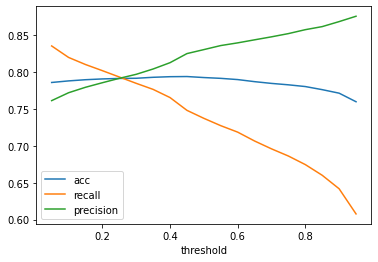

In [ ]:
import matplotlib.pyplot as plt

plt.plot(thresholds, acc_list, label='acc')
plt.plot(thresholds, recall_list, label='recall')
plt.plot(thresholds, precision_list, label='precision')
plt.xlabel('threshold')
plt.legend()
plt.show()

# Q9. 다음 텍스트가 positive할 확률을 출력하시오.

"이 영화는 명작인지, 망작인지 너무나 혼란스럽고 즐겁다."




In [ ]:
####################
## Your Code here ##
####################
my_review = ['이 영화는 명작인지, 망작인지 너무나 혼란스럽고 즐겁다.']
my_review = tokenizer.texts_to_sequences(my_review)
my_review = pad_sequences(my_review, maxlen=max_len)
my_review = np.array(my_review)

my_pred = model.predict(my_review)
my_review = 'positive' if my_pred[0,0] >=0.5 else 'Negative'
print(f"모델의 예측 : {my_review},   prob = {my_pred[0,0]*100:.2f}%")

모델의 예측 : positive,   prob = 100.00%


# Q10. 아래 주어진 문장을, 주어진 조건에 따라 분석하시오.

review = '명작이지ㅋ 특히 명절때만 되면 티비에서 참 많이 해줬었는데, 웃기기도하고, 액션도 가미되었고...특히 가족같은 형제라는 주제가 안방에 잘 먹혔던거 같다.'

* 루프문과 print를 이용하여 아래와 같은 방식으로 출력하시오.
    1. positive확률 :  50%,  인풋 : '명작이지ㅋ'
    2. positive확률 :  55%, 인풋 : '명작이지ㅋ 특히'
    3. positive확률 : 56%, 인풋 : '명작이지ㅋ 특히 명절때만'
    4. .....(계속 한 단어씩 증가 시키기)
    5. positive확률 : 98%, 인풋 : '명작이지~ 같다.'
* 인풋으로 사용한 문장과 확률은 명확히 출력되어야 한다.
    * 나머지는 출력되지 않아도 좋다.

In [ ]:
####################
## Your code here ##
####################
review = '명작이지ㅋ 특히 명절때만 되면 티비에서 참 많이 해줬었는데, 웃기기도하고, 액션도 가미되었고...특히 가족같은 형제라는 주제가 안방에 잘 먹혔던거 같다.'
review = review.split()
review

['명작이지ㅋ',
 '특히',
 '명절때만',
 '되면',
 '티비에서',
 '참',
 '많이',
 '해줬었는데,',
 '웃기기도하고,',
 '액션도',
 '가미되었고...특히',
 '가족같은',
 '형제라는',
 '주제가',
 '안방에',
 '잘',
 '먹혔던거',
 '같다.']

In [ ]:
for i in range(len(review)):
    input = review[:i+1]
    input = [' '.join(input)]
    new_input = input
    input = tokenizer.texts_to_sequences(input)
    input = pad_sequences(input, maxlen=max_len)
    input = np.array(input)
    output = model.predict(input)
    output_label = 'positive' if output[0,0] >=0.5 else 'Negative'
    print(f"positive확률 : {output[0,0]*100:.2f}%, 인풋 : {new_input[0]}")

positive확률 : 42.41%, 인풋 : 명작이지ㅋ
positive확률 : 72.15%, 인풋 : 명작이지ㅋ 특히
positive확률 : 72.15%, 인풋 : 명작이지ㅋ 특히 명절때만
positive확률 : 71.57%, 인풋 : 명작이지ㅋ 특히 명절때만 되면
positive확률 : 31.21%, 인풋 : 명작이지ㅋ 특히 명절때만 되면 티비에서
positive확률 : 0.03%, 인풋 : 명작이지ㅋ 특히 명절때만 되면 티비에서 참
positive확률 : 8.63%, 인풋 : 명작이지ㅋ 특히 명절때만 되면 티비에서 참 많이
positive확률 : 8.63%, 인풋 : 명작이지ㅋ 특히 명절때만 되면 티비에서 참 많이 해줬었는데,
positive확률 : 99.94%, 인풋 : 명작이지ㅋ 특히 명절때만 되면 티비에서 참 많이 해줬었는데, 웃기기도하고,
positive확률 : 99.91%, 인풋 : 명작이지ㅋ 특히 명절때만 되면 티비에서 참 많이 해줬었는데, 웃기기도하고, 액션도
positive확률 : 100.00%, 인풋 : 명작이지ㅋ 특히 명절때만 되면 티비에서 참 많이 해줬었는데, 웃기기도하고, 액션도 가미되었고...특히
positive확률 : 100.00%, 인풋 : 명작이지ㅋ 특히 명절때만 되면 티비에서 참 많이 해줬었는데, 웃기기도하고, 액션도 가미되었고...특히 가족같은
positive확률 : 100.00%, 인풋 : 명작이지ㅋ 특히 명절때만 되면 티비에서 참 많이 해줬었는데, 웃기기도하고, 액션도 가미되었고...특히 가족같은 형제라는
positive확률 : 99.99%, 인풋 : 명작이지ㅋ 특히 명절때만 되면 티비에서 참 많이 해줬었는데, 웃기기도하고, 액션도 가미되었고...특히 가족같은 형제라는 주제가
positive확률 : 99.99%, 인풋 : 명작이지ㅋ 특히 명절때만 되면 티비에서 참 많이 해줬었는데, 웃기기도하고, 액션도 가미되었고...특히 가족같은 형제라는 주제가 안방에
positive확률 : 99.93%, 인풋 : 명작이지ㅋ 특히 명절